# 

In [23]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import mdtraj as md
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from functools import partial

# source modules and classes 
from writhe_tools.md_tools import ResidueDistances, load_traj
from writhe_tools.utils import lsdir, symbols, reindex_list
from writhe_tools.stats import DensityComparator, pca
from writhe_tools.plots import annotated_matrix_plot


In [37]:
root = "/home/t/r1r2/kaush"
protein_paths = lsdir("/home/t/r1r2/kaush",
                      exclude=[".", "elvim",'metric',
                               "png","dihedral", 'density',
                               "ELViM", "X", "weights"]
                     )

proteins = [f"{symbols('alpha')}-Synuclein", "PaaA2", "ACTR", "drkN-SH3", f"A{symbols('beta')}-40"]
protein_paths = reindex_list(protein_paths, [2, 4, 1, 3, 0])
force_feilds = ["a99SBdisp", "Charmm36m", "c22star-TIP3P"]


In [25]:
 # Repeat same plot

In [29]:
def fill_mat(x, diag:np.ndarray= None):
    matrix = np.empty((3, 3,))
    i, j = np.triu_indices(3, 1)
    matrix[i, j] = x
    matrix[j, i] = x
    if diag is not None:
        matrix[np.diag_indices(3)] = diag
    return matrix
    
def plot_result(metric, metric_name, iterate, attr, name, diag=None):
    fig, axes = plt.subplots(1, 2, figsize=(9, 5))
    
    ax=axes.flat
    annotated_matrix_plot(fill_mat(dens.compare(attr=attr, metric=metric, iterate=iterate), diag=np.ones(3)),
             cmap='Blues',
             figsize=.5,
             font_scale=.3,
             decimals=4,
             textcolor='black',
             tick_labels=["a99-disp", "C36m", "c-22*"],
             alpha=.8,
             xlabel="$Ensemble_{i}$",
             ylabel=r"$Ensemble_{j}$",
             title="2D Residue Distance PCA",
             cbar_label=metric_name,
             ax=ax[0])
    
    annotated_matrix_plot(fill_mat(dens.compare(attr=attr, metric=metric, iterate=iterate, weight=True), diag=diag),
             cmap='Reds',
             figsize=.5,
             font_scale=.3,
             decimals=4,
             textcolor='black',
             tick_labels=["a99-disp", "C36m", "c-22*"],
             alpha=.8,
             xlabel="$Ensemble_{i}$",
             ylabel=r"$Ensemble_{j}$",
             title="Reweighted\n 2D Residue Distance PCA",
             cbar_label=metric_name,
             ax=ax[1])
    fig.suptitle(name, fontsize=16, y=1.02)
    fig.tight_layout()


def to_pc(x):
    r = np.linalg.norm(x, axis = 1)
    theta = np.arctan2(x[..., 1], x[..., 0])
    return np.stack([theta, r / r.max()], 1)

In [30]:
from sklearn.metrics import silhouette_score

/home/t/writhe/Writhe_Package_Lite/src/writhe_tools/utils/sorting.py:75: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


Loading Trajectory File : /home/t/r1r2/kaush/asyn/asyn-a99SBdisp-Traj.dcd with top file : /home/t/r1r2/kaush/asyn/asyn.pdb
Loading Trajectory File : /home/t/r1r2/kaush/asyn/asyn-Charmm36m-Traj.dcd with top file : /home/t/r1r2/kaush/asyn/asyn.pdb
Loading Trajectory File : /home/t/r1r2/kaush/asyn/asyn-c22star-TIP3P-Traj.dcd with top file : /home/t/r1r2/kaush/asyn/asyn.pdb


/home/t/writhe/Writhe_Package_Lite/src/writhe_tools/utils/sorting.py:75: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


Loading Trajectory File : /home/t/r1r2/kaush/paaa2/PaaA2-a99SBdisp-Traj.dcd with top file : /home/t/r1r2/kaush/paaa2/PaaA2.pdb
Loading Trajectory File : /home/t/r1r2/kaush/paaa2/PaaA2-Charmm36m-Traj.dcd with top file : /home/t/r1r2/kaush/paaa2/PaaA2.pdb
Loading Trajectory File : /home/t/r1r2/kaush/paaa2/PaaA2-c22star-TIP3P-Traj.dcd with top file : /home/t/r1r2/kaush/paaa2/PaaA2.pdb


/home/t/writhe/Writhe_Package_Lite/src/writhe_tools/utils/sorting.py:75: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


Loading Trajectory File : /home/t/r1r2/kaush/actr/ACTR-a99SBdisp-Traj.dcd with top file : /home/t/r1r2/kaush/actr/ACTR.pdb
Loading Trajectory File : /home/t/r1r2/kaush/actr/ACTR-Charmm36m-Traj.dcd with top file : /home/t/r1r2/kaush/actr/ACTR.pdb
Loading Trajectory File : /home/t/r1r2/kaush/actr/ACTR-c22star-TIP3P-Traj.dcd with top file : /home/t/r1r2/kaush/actr/ACTR.pdb


/home/t/writhe/Writhe_Package_Lite/src/writhe_tools/utils/sorting.py:75: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


Loading Trajectory File : /home/t/r1r2/kaush/drkn/drkN-a99SBdisp-Traj.dcd with top file : /home/t/r1r2/kaush/drkn/drkN.pdb
Loading Trajectory File : /home/t/r1r2/kaush/drkn/drkN-Charmm36m-Traj.dcd with top file : /home/t/r1r2/kaush/drkn/drkN.pdb
Loading Trajectory File : /home/t/r1r2/kaush/drkn/drkN-c22star-TIP3P-Traj.dcd with top file : /home/t/r1r2/kaush/drkn/drkN.pdb


/home/t/writhe/Writhe_Package_Lite/src/writhe_tools/utils/sorting.py:75: UserWarning: Not all strings contain a number, returning unsorted input list to avoid throwing an error. If you want to only consider strings that contain a digit, set indexed to True 
  warnings.warn("Not all strings contain a number, returning unsorted input list to avoid throwing an error. "


Loading Trajectory File : /home/t/r1r2/kaush/ab40/Ab40-a99SBdisp-Traj.dcd with top file : /home/t/r1r2/kaush/ab40/Ab40.pdb
Loading Trajectory File : /home/t/r1r2/kaush/ab40/Ab40-Charmm36m-Traj.dcd with top file : /home/t/r1r2/kaush/ab40/Ab40.pdb
Loading Trajectory File : /home/t/r1r2/kaush/ab40/Ab40-c22star-TIP3P-Traj.dcd with top file : /home/t/r1r2/kaush/ab40/Ab40.pdb


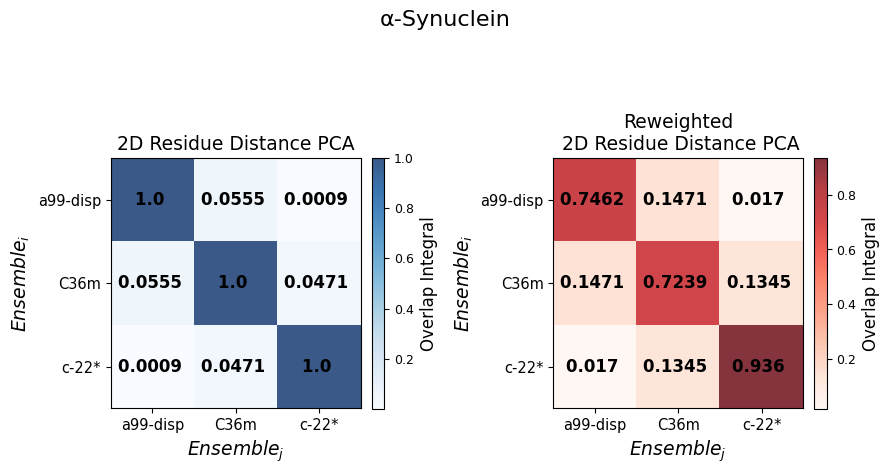

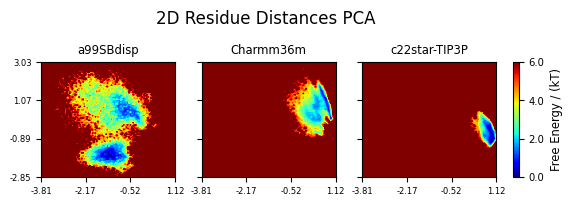

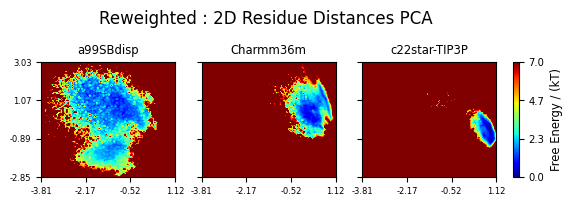

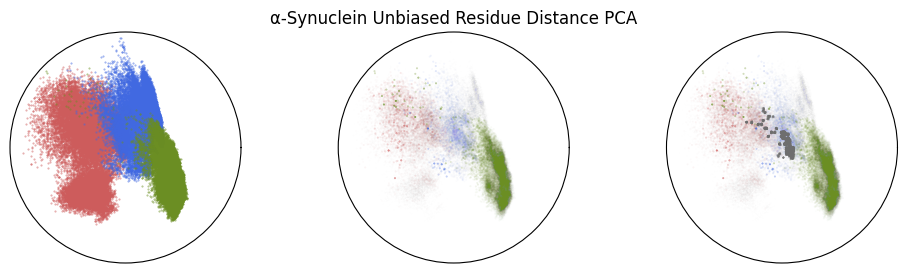

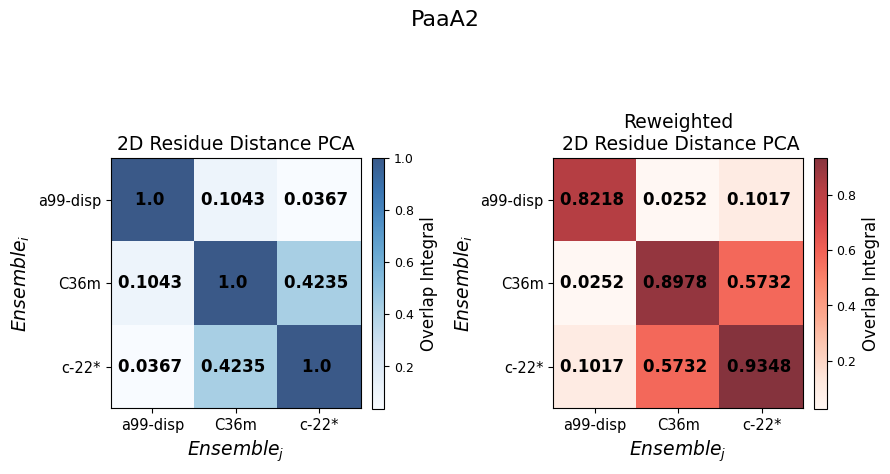

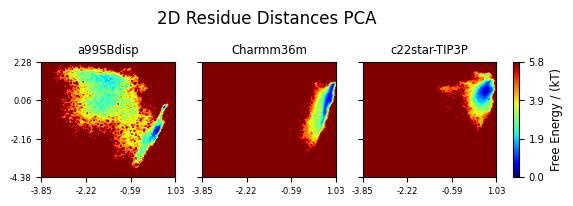

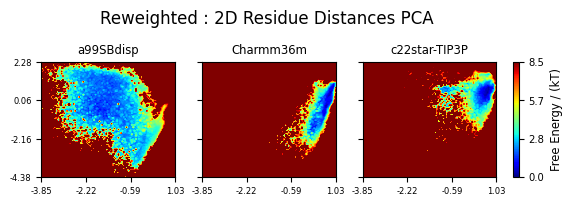

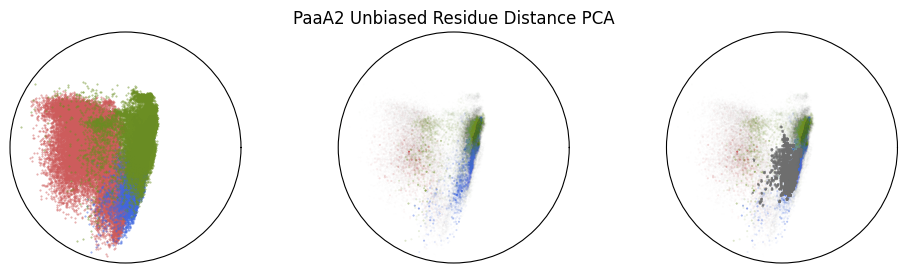

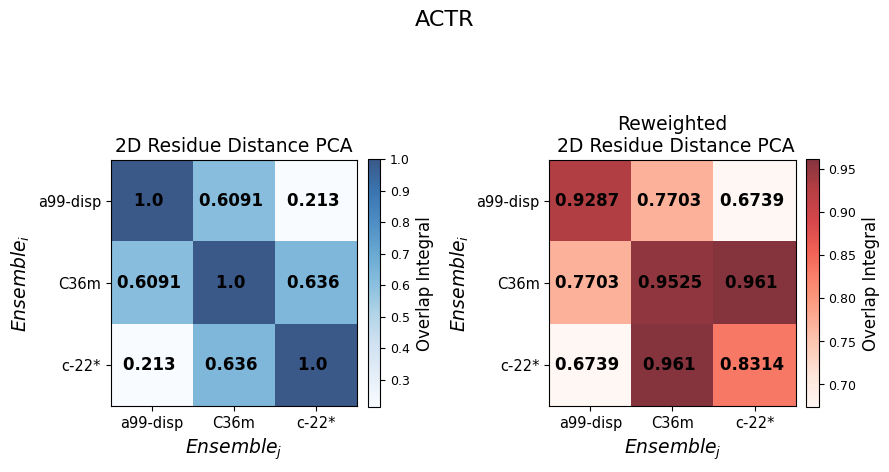

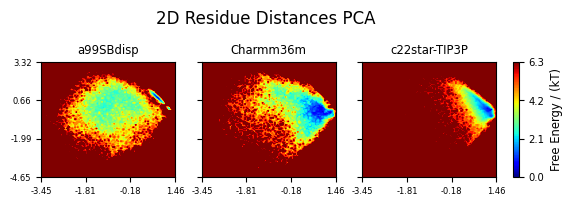

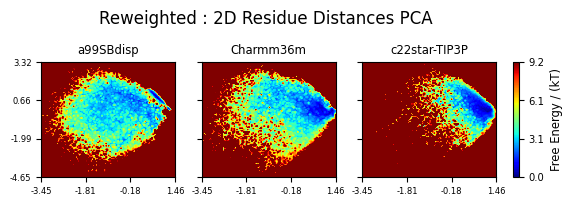

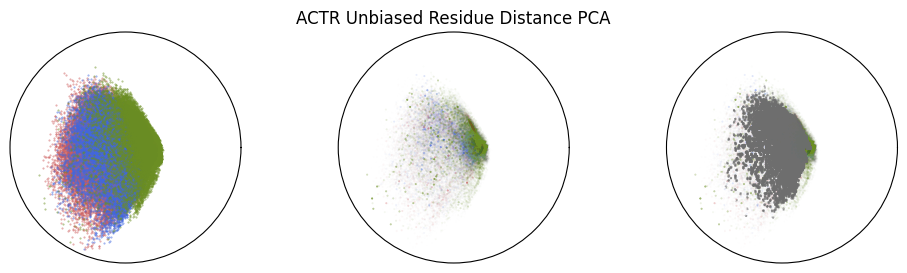

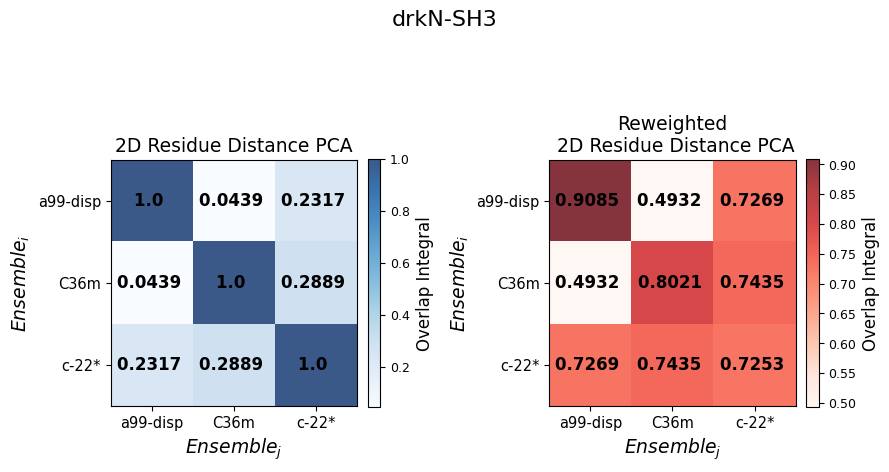

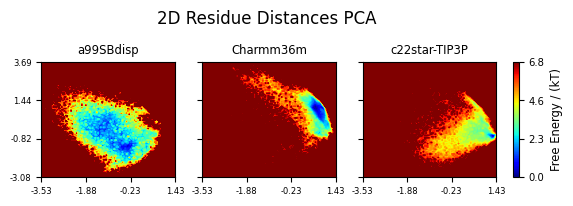

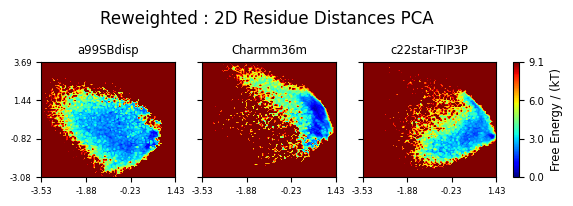

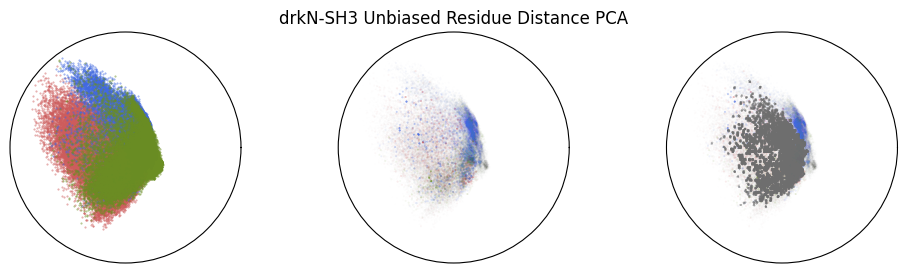

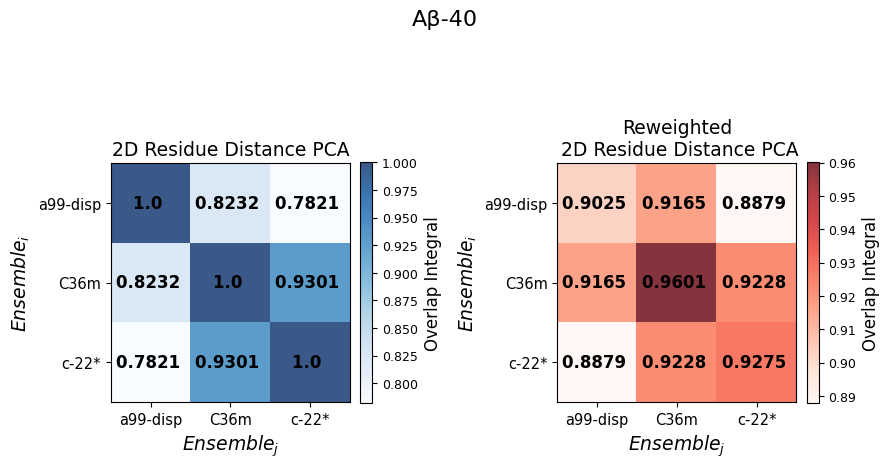

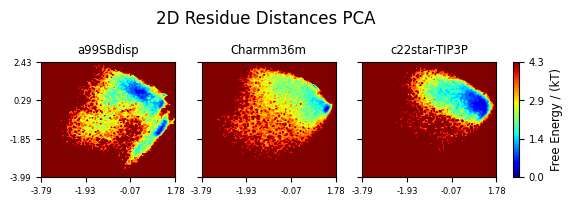

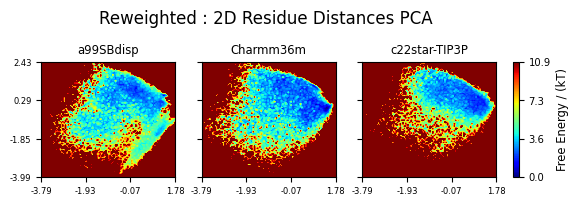

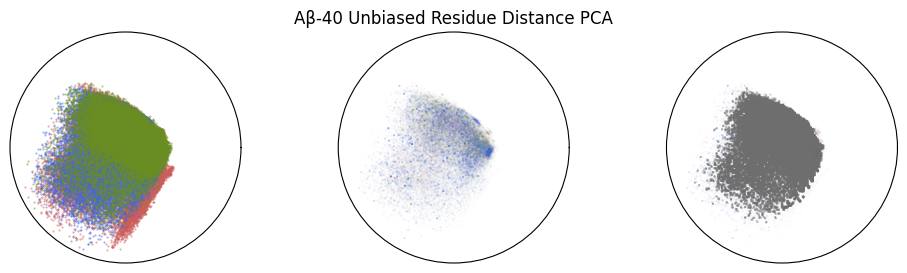

In [33]:
for index in range(len(proteins)):
    weights = np.concatenate([np.loadtxt(lsdir(f'{protein_paths[index]}/{i}', 'weight')[0]) for i in force_feilds])
    trajs = [load_traj(dir=protein_paths[index],
                       traj_keyword=i,
                       pdb_keyword=protein_paths[index].split("/")[-1],
                       stride=1,
                       selection="name CA")[0][1:] for i in force_feilds]
    lengths = np.array([i.n_frames for i in trajs])
    split = np.cumsum(lengths)[:-1]
    dens = DensityComparator(np.array_split(pca(ResidueDistances(np.arange(trajs[0].n_atoms),
                                                                 md.join(trajs)).distances,
                                                n_comp=2, scale_projection=True)[0], split),
                            weights = np.array_split(weights, split))
    dens.estimate_kde()
    dens.estimate_kde(weight=True)
    dens.estimate_hist()
    shared_states = np.asarray(list(set.intersection(*map(set, dens.hist_dtrajs))))
    
    metric_name = "Overlap Integral"
    metric = None
    # cmap = 'coolwarm'
    
    plot_result(metric, metric_name, False, 'kdes', proteins[index], dens.compare('kdes', 
                                                                                  pairs=np.stack(np.diag_indices(3)).T, 
                                                                                  weight0=False,
                                                                                  weight1=True)
               )
    
    dens.plot_hist(title="2D Residue Distances PCA", dscrs=force_feilds)
    dens.plot_hist(weight=True, title="2D Residue Distances PCA", dscrs=force_feilds)
    # score = silhouette_score(np.concatenate(dens.data_list), np.concatenate([np.ones(j) * i for i, j in enumerate(lengths)]))
    # scores.append(score)
    data = dens.data_list
    fig, axes = plt.subplots(1,3, figsize=(12,3), sharey=False, sharex=False, subplot_kw={'projection': 'polar'})
    ax=axes.flat
    ax[0].scatter(*to_pc(data[0]).T, s=.2, c="indianred", label=force_feilds[0], alpha=.6,)
    ax[0].scatter(*to_pc(data[1]).T, s=.2, c="royalblue", label=force_feilds[1], alpha=.6)
    ax[0].scatter(*to_pc(data[2]).T, s=.2, c="olivedrab", label=force_feilds[2], alpha=.6)
    ax[0].grid(False)
    ax[0].set_xticks([],[])
    ax[0].set_yticks([], [])
    ax[0].tick_params(left = False, bottom = False)
    ax[0].set_aspect("equal", anchor="C")

    #fig, ax = plt.subplots(1,1, figsize=(4,3), sharey=False, sharex=False, subplot_kw={'projection': 'polar'})

    ax[1].scatter(*to_pc(data[0]).T, s=.2,
                  c="indianred",
                  label=force_feilds[0],
                  alpha=dens.weights_list[0] / dens.weights_list[0].max(),)
    
    ax[1].scatter(*to_pc(data[1]).T,
                  s=.2, 
                  c="royalblue",
                  label=force_feilds[1],
                  alpha=dens.weights_list[1] / dens.weights_list[1].max())
                
    ax[1].scatter(*to_pc(data[2]).T,
                  s=.2, c="olivedrab",
                  label=force_feilds[2], 
                  alpha=dens.weights_list[2] / dens.weights_list[2].max())
    ax[1].set_title(f"{proteins[index]} Unbiased Residue Distance PCA")
    ax[1].grid(False)
    ax[1].set_xticks([],[])
    ax[1].set_yticks([], [])
    ax[1].tick_params(left = False, bottom = False)
    ax[1].set_aspect("equal", anchor="C")

    
    
    
    ax[2].scatter(*to_pc(data[0]).T, s=.2,
                  c="indianred",
                  label=force_feilds[0],
                  alpha=dens.weights_list[0] / dens.weights_list[0].max(),)
    
    ax[2].scatter(*to_pc(data[1]).T,
                  s=.2, 
                  c="royalblue",
                  label=force_feilds[1],
                  alpha=dens.weights_list[1] / dens.weights_list[1].max())
                
    ax[2].scatter(*to_pc(data[2]).T,
                  s=.2, c="olivedrab",
                  label=force_feilds[2], 
                  alpha=dens.weights_list[2] / dens.weights_list[2].max())
                
    ax[2].scatter(*to_pc(np.concatenate(data)).T, s=.02, c="#6e6e6e", 
                  alpha=np.isin(np.concatenate(dens.hist_dtrajs), shared_states).astype(int)
                 )

    ax[2].grid(False)
    ax[2].set_xticks([],[])
    ax[2].set_yticks([], [])
    ax[2].tick_params(left = False, bottom = False)
    ax[2].set_aspect("equal", anchor="C")

#metric = partial(waz, centers=dens.hist_bin_centers)


In [38]:

weight_files = [[lsdir(f"{path}/{ff}", keyword="weight") for ff in force_feilds] for path in protein_paths]
elvim_files = [lsdir(f"{path}/elvim", keyword="cat", exclude="npy")[0] for path in protein_paths]
weights = np.stack([np.stack([np.loadtxt(lsdir(f"{path}/{ff}", keyword="weight")[0])[1:][::2] for ff in force_feilds]) for path in protein_paths])
elvim = np.stack([np.stack([i[1:] for i in np.array_split(np.loadtxt(lsdir(f"{path}/elvim", keyword="cat", exclude="npy")[0]), 3)]) for path in protein_paths])
score = [silhouette_score(np.concatenate(k), 
                          np.concatenate([np.ones(len(j)) * i for i, j in enumerate(k)]))
         for k in elvim]

In [56]:
import pandas
elvim_scores, pca_scores = np.load("2d_elvim_scores.npy"), np.load("2d_distance_pca_scores.npy")
print("Silhouette Scores - Compare how well the latent spaces resolve the simulation ensembles")
pandas.DataFrame(np.stack([elvim_scores, pca_scores]).round(3), columns=proteins, index=['ELViM', 'PCA'])

Silhouette Scores - Compare how well the latent spaces resolve the simulation ensembles


,α-Synuclein,PaaA2,ACTR,drkN-SH3,Aβ-40
ELViM,0.362,0.412,0.119,0.255,0.060
PCA,0.363,0.107,0.063,0.183,-0.034
